In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets
data_dict = sklearn.datasets.load_breast_cancer()
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 30)

In [5]:
data_dict['target'].shape

(569,)

In [6]:
np.random.choice(data_dict['target'], 10) # 0 is for malignant and 1 is for benign

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [7]:
data['isMalignant'] = data_dict['target'] == 0

In [8]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'isMalignant'],
      dtype='object')

### Feature Selection

What features could be good for our classifier? 

- A good approach would be to gain some domain knowledge about each of this features,
- Explore each feature (such as correlation between features and(or) label)
- Use cross-validation to find the best features. 

Here, a good starting point could be the size of the tumor (`mean radius`). As, larger tumors are probably more likely to be malignant. 

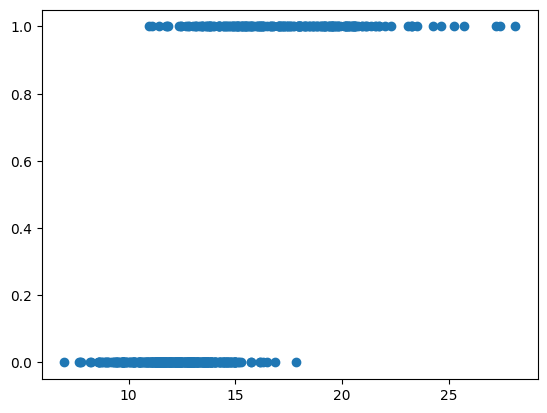

In [9]:
x = data['mean radius']
y = data['isMalignant']
plt.scatter(x, y)

Since lots of points are plotted on top of each other, it's hard ot see how the values are distributed. We can add some jitter, transparency to see the points. 

In [10]:
def jitter(data, offset=0.1):
    return data + offset * np.random.rand(len(data)) - offset/2.0

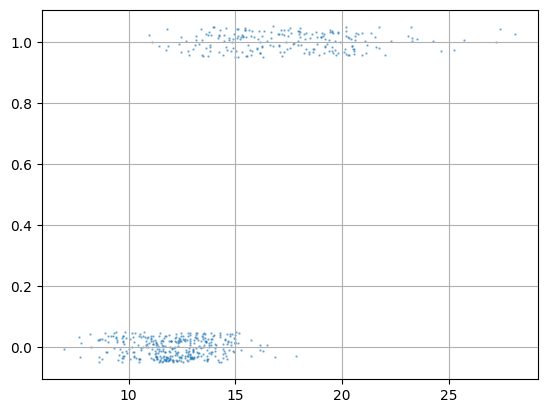

In [11]:
x = data['mean radius']
y = jitter(data['isMalignant'])
plt.scatter(x, y, alpha=0.5, s=0.5)
plt.grid()
plt.show()

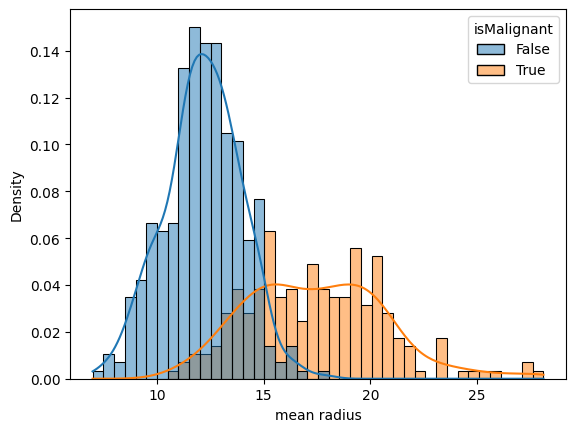

In [12]:
sns.histplot(data, x='mean radius', binwidth=0.5, stat='density', kde=True, hue='isMalignant')
plt.show()

What can you deduce from the histogram above?

### Train-test split

In [13]:
from sklearn.model_selection import train_test_split
data_tr, data_te = train_test_split(data, test_size=0.10, random_state=42)
print("Training Data Size: ", len(data_tr))
print("Test Data Size: ", len(data_te))

Training Data Size:  512
Test Data Size:  57


In [14]:
tr_X = data_tr[['mean radius']].to_numpy()
tr_y = data_tr['isMalignant'].to_numpy()

In [15]:
te_X = data_te[['mean radius']].to_numpy()
te_y = data_te['isMalignant'].to_numpy()

In [16]:
tr_X.shape, tr_y.shape

((512, 1), (512,))

In [17]:
te_X.shape, te_y.shape

((57, 1), (57,))

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(tr_X, tr_y)

LinearRegression()

In [20]:
lin_reg.coef_, lin_reg.intercept_

(array([0.09876376]), np.float64(-1.0188425819755598))

In [21]:
tr_X[:,0].shape

(512,)

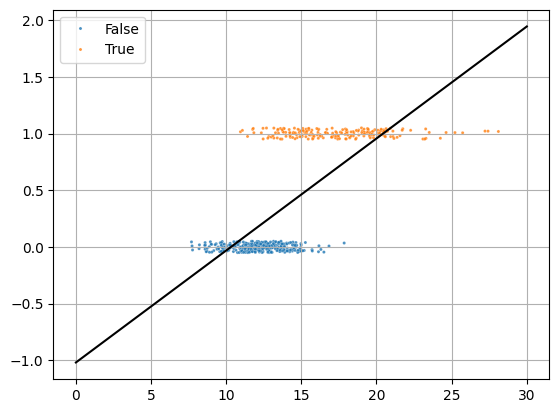

In [22]:
x = np.linspace(0, 30, 100)
y = lin_reg.coef_[0] * x + lin_reg.intercept_
plt.plot(x, y, c='black')
sns.scatterplot(x=tr_X[:,0], y=jitter(tr_y), alpha=0.8, s=5, hue=tr_y)
plt.grid()
plt.show()

### Performance Metrics

In [23]:
from sklearn.metrics import mean_squared_error as mse

pred_y = lin_reg.predict(tr_X)
print("Training RMSE: ", np.sqrt(mse(tr_y, pred_y)))

Training RMSE:  0.33705673123730695


It's hard to interpret this RMSE value in context of a classification task. 

A error value between [0-1] can tell us, how confident a model is about a particular predicted label. It's hard to capture such notion with RMSE. 

In [24]:
actual_pred_y = pred_y > 0.5 # decision boundary

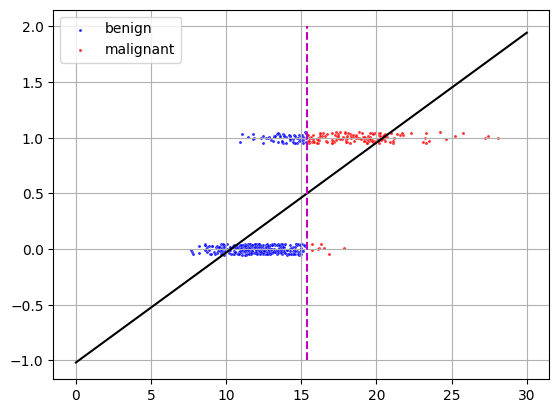

In [25]:
x = np.linspace(0, 30, 100)
y = lin_reg.coef_[0] * x + lin_reg.intercept_
plt.plot(x, y, c='black')

y = np.linspace(-1, 2, 100)
x = [(0.5 - lin_reg.intercept_)/lin_reg.coef_[0]]*len(y)
plt.plot(x, y, 'm--')

x = (0.5 - lin_reg.intercept_)/lin_reg.coef_[0]
sns.scatterplot(x=tr_X[tr_X[:,0] < x].flatten(), y=jitter(tr_y[tr_X[:, 0] < x]), alpha=0.8, s=5, color='blue', label='benign')
sns.scatterplot(x=tr_X[tr_X[:,0] > x].flatten(), y=jitter(tr_y[tr_X[:, 0] > x]), alpha=0.8, s=5, color='red', label='malignant')
plt.legend()
plt.grid()
plt.show()

In [26]:
accuracy = np.sum(tr_y == actual_pred_y) / len(tr_y)
accuracy

np.float64(0.865234375)

Are we happy with this prediction model? 

### What is the baseline model?

In [27]:
unique, counts = np.unique(tr_y, return_counts=True)
unique, counts

(array([False,  True]), array([317, 195]))

In [28]:
counts/len(tr_y) * 100

array([61.9140625, 38.0859375])

### Class imbalance

Class imbalance when you have disproportionate fraction of the samples in one class. 
In many cases, (such as fraud detection) you will only have very tiny fraction of training data, that may contain examples in particular class. 

In such case, we can always achieve high accuracy by just predicting all data points with the frequent label, without needing any good classifier. This is not good approach, as our model will have less effectiveness in detecting rare data points. 

#### Addressing class imbalance:
- You should use stratified sampling to make sure your train-test split has similar representation as your population. 
- Try learning algorithm that are a little more robust to class imbalance (eg. decision trees)
- Adjust the loss function to put a larger penalty on the smaller class. 

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(tr_X, tr_y)

LogisticRegression()

In [30]:
pred_y = log_reg.predict(tr_X)
accuracy = np.sum(tr_y == pred_y) / len(tr_y)
accuracy

np.float64(0.869140625)

In [31]:
np.sum(te_y == log_reg.predict(te_X)) / len(te_y)

np.float64(0.9473684210526315)

### Performance metrics 

**Precision** is the fraction of true positives among the total number of data points predicted as positive. Eg: video safe for kids

**Recall (aka sensitivity)** is the fraction of true positives among the total number of data points with positive labels. Eg: catching shoplifters

Precision measures the ability of our model to not predict negative samples as positive; in other words reduce false positives. 

Recall mesaures the ability of our model to find all the positive samples. 

What is the relationship between precision and recall? 

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tr_y, pred_y)

array([[294,  23],
       [ 44, 151]])

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(tr_y, pred_y) # 151 / (151+23)

0.867816091954023

In [34]:
recall_score(tr_y, pred_y) # 151 / (151 + 44)

0.7743589743589744

In [35]:
f1_score(tr_y, pred_y) # similar precision and recall

0.8184281842818428

### Precision/Recall Tradeoff

In [36]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, tr_X, tr_y, cv=3, method="decision_function")

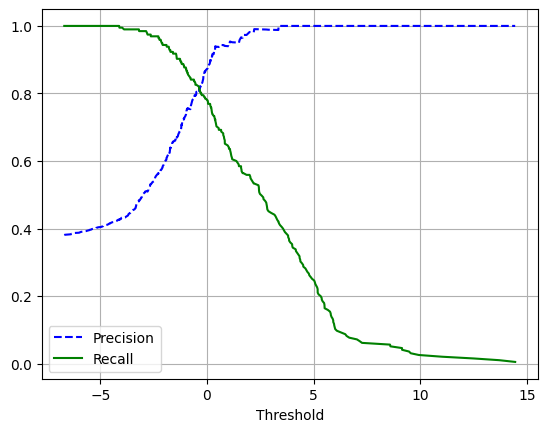

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(tr_y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

In [38]:
precisions, recalls, thresholds

(array([0.38085938, 0.3816047 , 0.38235294, 0.38310413, 0.38385827,
        0.38461538, 0.38537549, 0.38613861, 0.38690476, 0.38767396,
        0.38844622, 0.38922156, 0.39      , 0.39078156, 0.39156627,
        0.39235412, 0.39314516, 0.39393939, 0.39473684, 0.39553753,
        0.39634146, 0.39714868, 0.39795918, 0.39877301, 0.39959016,
        0.40041068, 0.40123457, 0.40206186, 0.40289256, 0.40372671,
        0.40456432, 0.40540541, 0.40625   , 0.40709812, 0.40794979,
        0.40880503, 0.40966387, 0.41052632, 0.41139241, 0.41226216,
        0.41313559, 0.41401274, 0.41489362, 0.41577825, 0.41666667,
        0.41755889, 0.41845494, 0.41935484, 0.42025862, 0.42116631,
        0.42207792, 0.42391304, 0.4248366 , 0.42576419, 0.42669584,
        0.4254386 , 0.42637363, 0.42731278, 0.42825607, 0.43015521,
        0.43207127, 0.43303571, 0.43176734, 0.43273543, 0.43468468,
        0.43566591, 0.43764172, 0.43863636, 0.43963554, 0.44063927,
        0.4416476 , 0.44266055, 0.44367816, 0.44

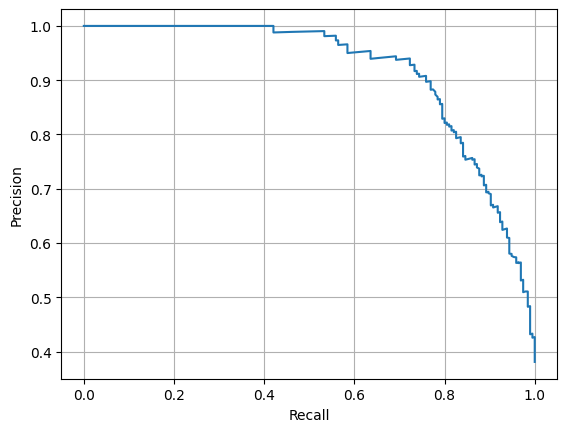

In [39]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [41]:
tr_y_pred_90 = (y_scores >= threshold_90_precision)

In [42]:
precision_score(tr_y, tr_y_pred_90)

0.9024390243902439

In [43]:
recall_score(tr_y, tr_y_pred_90)

0.7589743589743589

### ROC curve

FPR (false positive rate) is the ratio of negative instances that are incorrectly classified as positives. 

ROC curve plots recall (sensitivity) vs FPR (1 - TNR)

True negative rate is called specificity. The ratio of negative examples that are correctly classified as negatives. 

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(tr_y, y_scores)

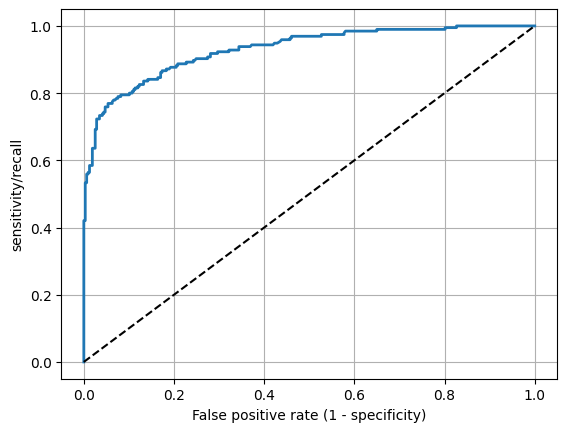

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.grid()
plt.xlabel('False positive rate (1 - specificity)')
plt.ylabel('sensitivity/recall')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(tr_y, y_scores)

np.float64(0.9298713904392137)

Whenever false positives are more important to consider or positive classes are rare then use precision-recall curve for performance metrics, 
otherwise use ROC curve. 

### Error Analysis

In [47]:
pred_y = cross_val_predict(log_reg, tr_X, tr_y, cv=3)
conf_mx = confusion_matrix(tr_y, pred_y)

In [48]:
conf_mx

array([[295,  22],
       [ 43, 152]])

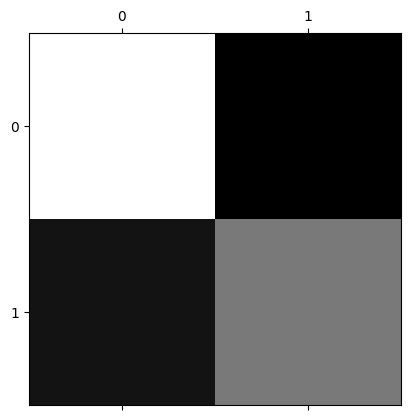

In [49]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

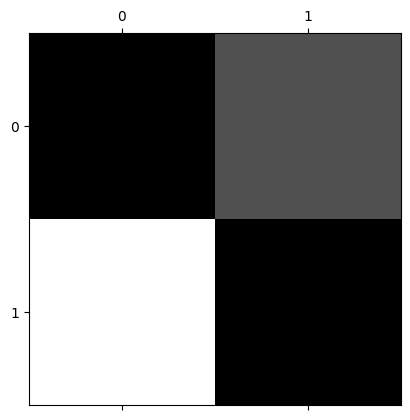

In [50]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [51]:
norm_conf_mx

array([[0.        , 0.06940063],
       [0.22051282, 0.        ]])

Find all the examples where actual datapoints are malignant but the model predicts them as benign, and investigate those features. See if by feature engineering keeping these examples in mind, can help improve our model. 